# TASK-03

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.duplicated().sum()

0

In [6]:
df = df[['age', 'job','marital','education','balance','housing','loan','campaign','pdays','previous','y']]
df.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,y
0,30,unemployed,married,primary,1787,no,no,1,-1,0,no
1,33,services,married,secondary,4789,yes,yes,1,339,4,no
2,35,management,single,tertiary,1350,yes,no,1,330,1,no
3,30,management,married,tertiary,1476,yes,yes,4,-1,0,no
4,59,blue-collar,married,secondary,0,yes,no,1,-1,0,no


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [8]:
df.corr(numeric_only=True)

,age,balance,campaign,pdays,previous
age,1.000000,0.083820,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.009976,0.009437,0.026196
campaign,-0.005148,-0.009976,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.067833,0.577562,1.000000


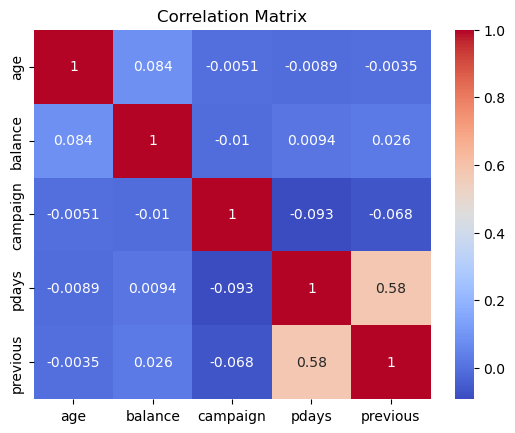

In [9]:
sns.heatmap(df.corr(numeric_only = True),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\fatem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


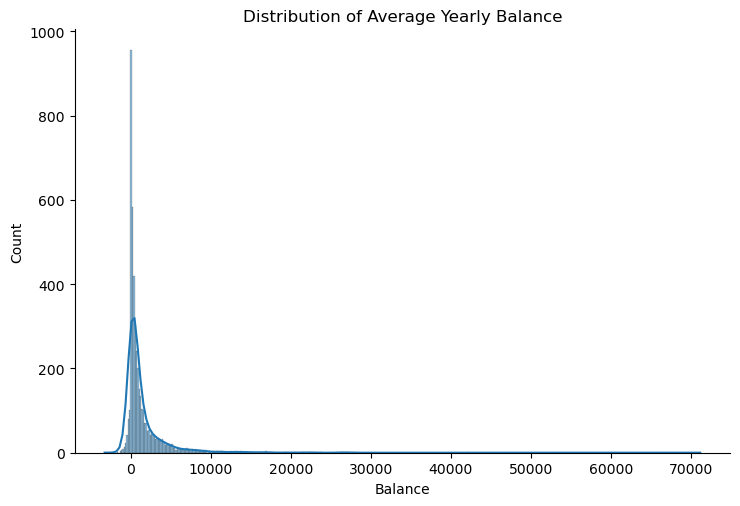

In [10]:
sns.displot(data = df, x='balance', kind ='hist', kde=True, aspect=1.5)
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

C:\Users\fatem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


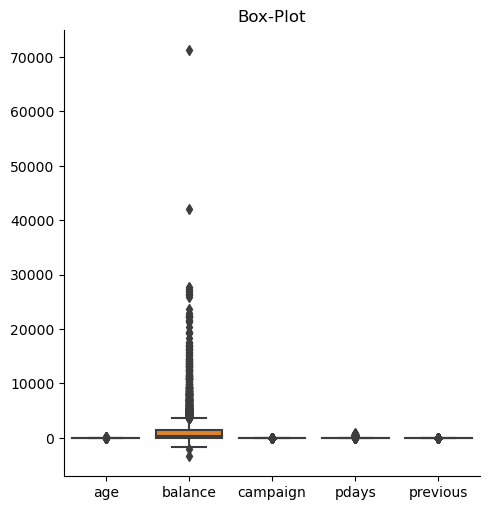

In [11]:
sns.catplot(data=df, kind='box')
plt.title('Box-Plot')
plt.show()

C:\Users\fatem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


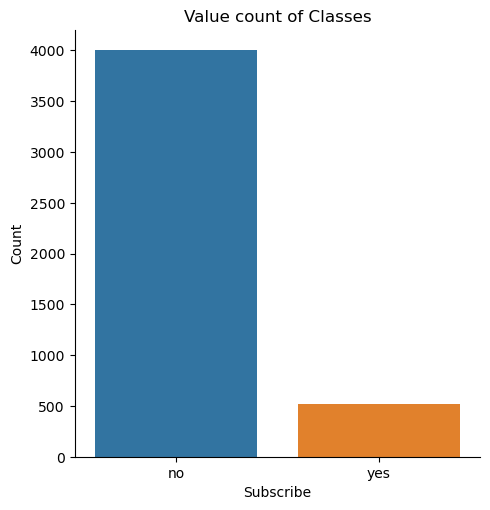

In [12]:
sns.catplot(data=df, x='y', kind='count')
plt.title('Value count of Classes')
plt.xlabel('Subscribe')
plt.ylabel('Count')
plt.show()

C:\Users\fatem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


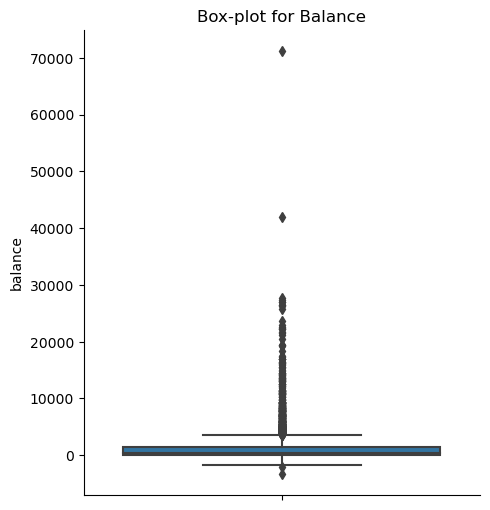

In [13]:
sns.catplot(data=df, y='balance', kind='box')
plt.title('Box-plot for Balance')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.loc[:,'balance'] = scaler.fit_transform(df[['balance']])

In [16]:
df['balance'].skew()

6.596430546295734

In [17]:
del_rows = df[df['balance']<-5].index  
len(del_rows)

0

In [18]:
df.drop(del_rows, axis=0, inplace= True)
df.shape 

(4521, 11)

In [20]:
job_count = df['job'].value_counts() 
job_count

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

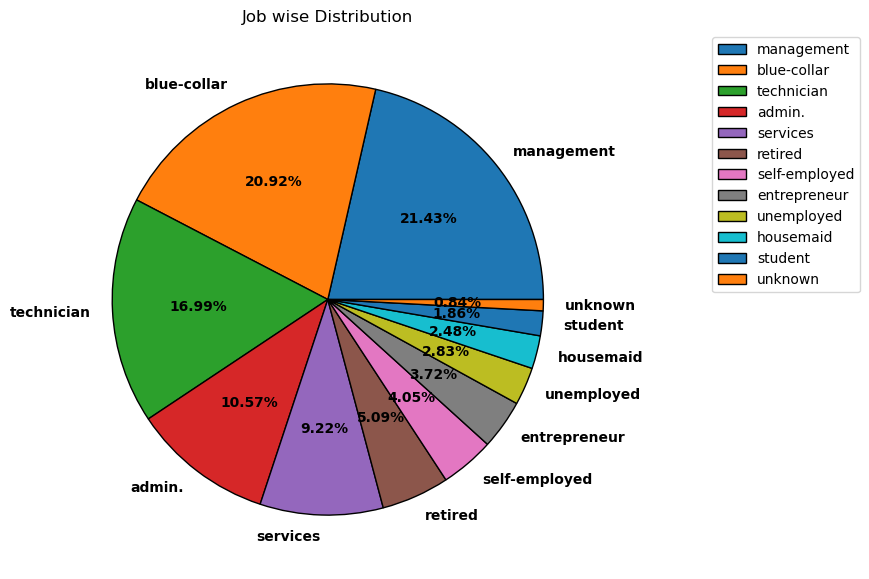

In [21]:
plt.figure(figsize=(10,7))

plt.pie(job_count, labels=job_count.index, autopct = '%.2f%%',wedgeprops={'linewidth':1,'edgecolor': 'black'},
       textprops={'weight':'bold'})
plt.legend(bbox_to_anchor=(1.5, 1))
plt.title('Job wise Distribution')
plt.show()

C:\Users\fatem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


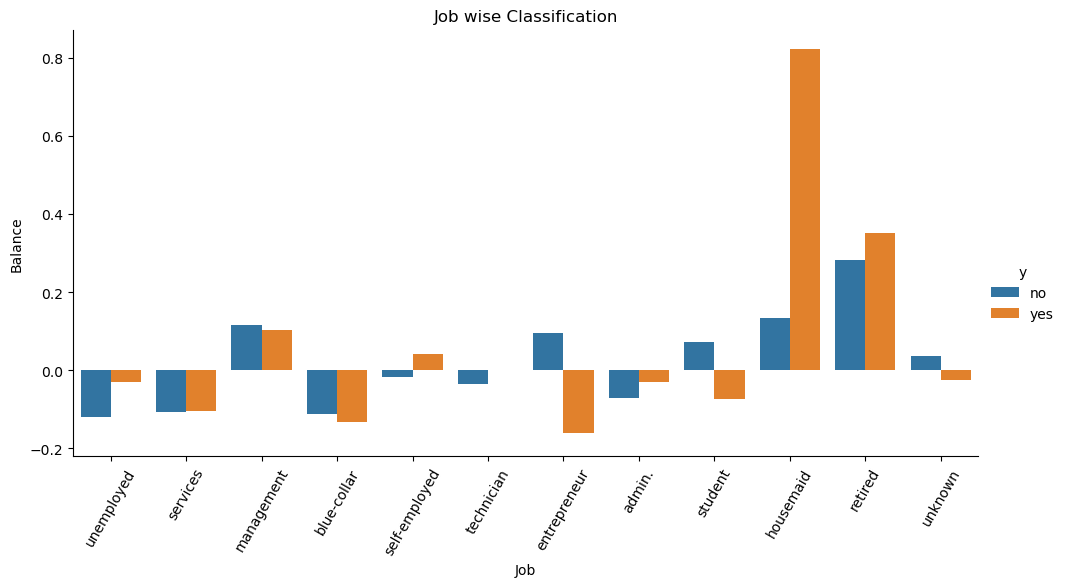

In [22]:
sns.catplot(data=df, x='job',y='balance',kind='bar',hue='y', aspect=2, errorbar=('ci', False))
plt.title('Job wise Classification')
plt.xlabel('Job')
plt.xticks(rotation = 60)
plt.ylabel('Balance')
plt.show()

C:\Users\fatem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


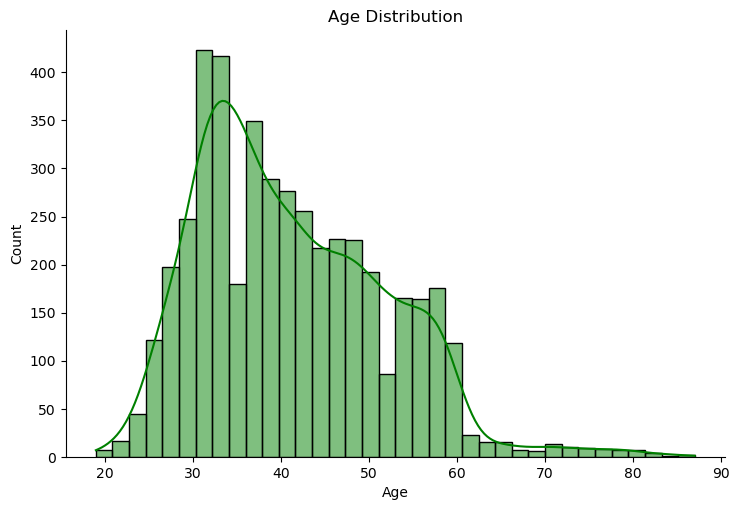

In [23]:
sns.displot(data = df, x='age', kind ='hist', kde=True, aspect=1.5, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\fatem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


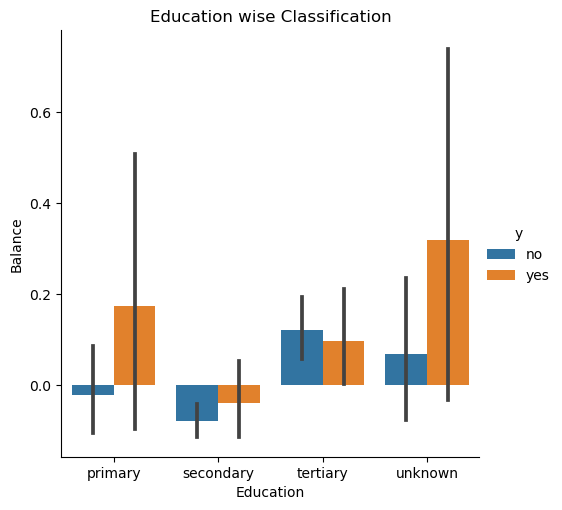

In [24]:
sns.catplot(data=df, x='education',y='balance',kind='bar',hue='y')
plt.title('Education wise Classification')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

In [25]:
df = pd.get_dummies(df,columns=['marital','education'])

In [26]:
df.head()

,age,job,balance,housing,loan,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,30,unemployed,0.121072,no,no,1,-1,0,no,False,True,False,True,False,False,False
1,33,services,1.118644,yes,yes,1,339,4,no,False,True,False,False,True,False,False
2,35,management,-0.024144,yes,no,1,330,1,no,False,False,True,False,False,True,False
3,30,management,0.017726,yes,yes,4,-1,0,no,False,True,False,False,False,True,False
4,59,blue-collar,-0.472753,yes,no,1,-1,0,no,False,True,False,False,True,False,False


In [36]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index([], dtype='object')
Index(['age', 'job', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown'],
      dtype='object')


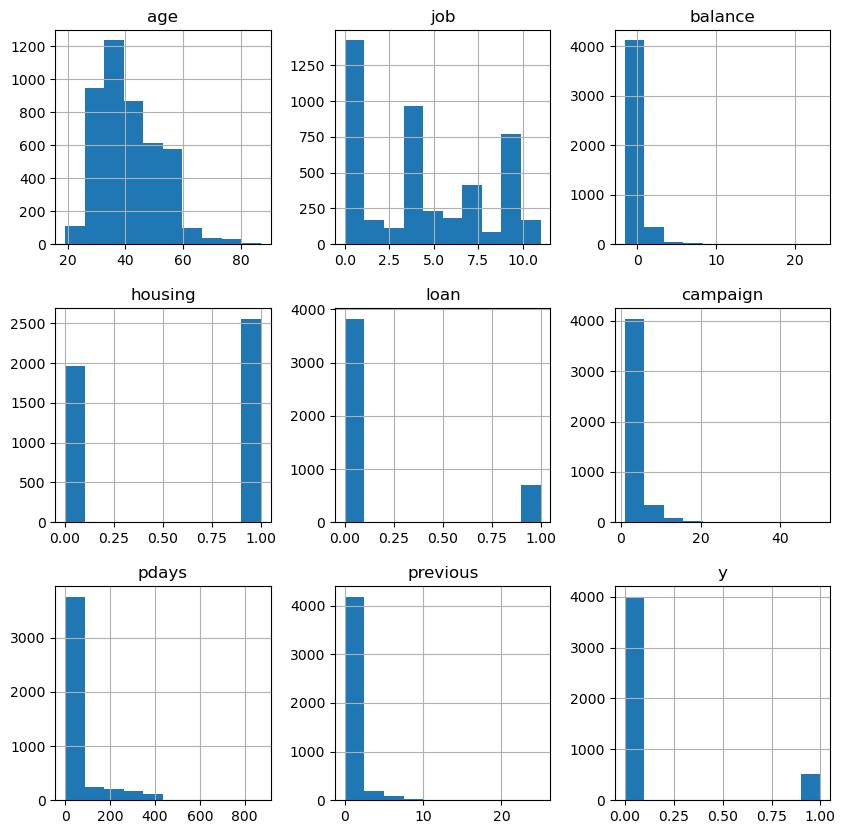

In [37]:
df.hist(figsize=(10,10))
plt.show()

                          age       job   balance   housing      loan  \
age                  1.000000 -0.021500  0.083820 -0.193888 -0.011250   
job                 -0.021500  1.000000  0.009797 -0.128353 -0.040245   
balance              0.083820  0.009797  1.000000 -0.050227 -0.071349   
housing             -0.193888 -0.128353 -0.050227  1.000000  0.018451   
loan                -0.011250 -0.040245 -0.071349  0.018451  1.000000   
campaign            -0.005148 -0.002739 -0.009976 -0.003574  0.017120   
pdays               -0.008894 -0.022760  0.009437  0.116893 -0.031086   
previous            -0.003511  0.005029  0.026196  0.038621 -0.022115   
y                    0.045092  0.027401  0.017905 -0.104683 -0.070517   
marital_divorced     0.148043  0.014363 -0.036284 -0.001197  0.017798   
marital_married      0.275139 -0.104652  0.017158  0.038432  0.032272   
marital_single      -0.410768  0.104782  0.007525 -0.041449 -0.048496   
education_primary    0.224938 -0.207393 -0.001551 -

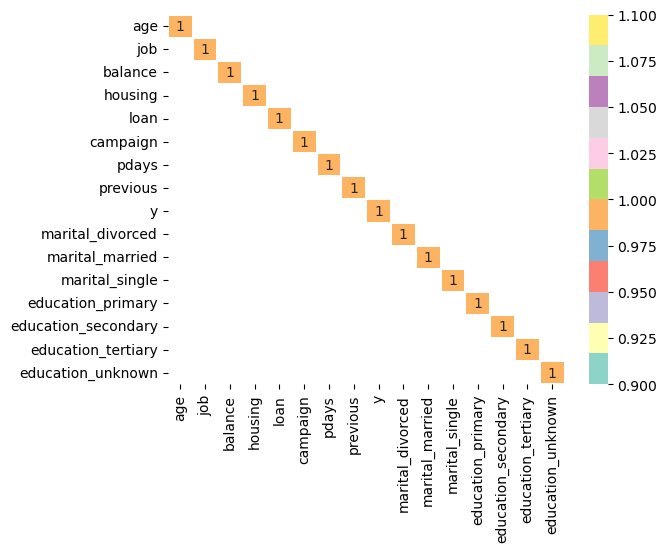

In [38]:
numeric_df = df.drop(columns=cat_cols)
corr = numeric_df.corr()
print(corr)
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [39]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [40]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown'],
      dtype='object')

In [42]:
df1.shape

(4521, 16)

In [45]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,balance,housing,loan,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,11,10,1475,0,0,0,0,0,0,0,1,0,1,0,0,0
1,14,7,2030,1,1,0,228,4,0,0,1,0,0,1,0,0
2,16,4,1303,1,0,0,219,1,0,0,0,1,0,0,1,0
3,11,4,1352,1,1,3,0,0,0,0,1,0,0,0,1,0
4,40,1,274,1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,119,1,0,4,0,0,0,0,1,0,0,1,0,0
4517,38,6,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4518,38,9,558,0,0,10,0,0,0,0,1,0,0,1,0,0
4519,9,1,1187,0,0,3,140,3,0,0,1,0,0,1,0,0
